# Assignment 2 Set 1

Q. Consider the data in teeth of mammals.csv  download  which contains data on the numbers of teeth
of different types in a variety of mammals. Do hierarchical clustering to obtain
the relevant dendrogram. Does this vary the number of clusters? With reference to the scree
plot, and your own opinion of which animals should be clustered together, how
many clusters do you think is optimal?

You may use python code to solve the problem. Justify each answer with relevant diagrams, calculations, and explanations.

Hint: Scree plot is used to determine a position at which dendrogram should be cut to obtain the desired number of clusters. For the definition of the scree plot, please refer to page 151, Ch.8 from Geoff Dougherty Book.

<span style="color:purple"> <strong>(Understanding and inference is printed in purple text)

## Import statements

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.decomposition import PCA

## Printing Dataset values

In [44]:
#Reading the dataset
df= pd.read_csv("teeth of mammals.csv")

In [3]:
df

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars
1,BROWN BAT,2,3,1,1,3,3,3,3
2,MOLE,3,2,1,0,3,3,3,3
3,SILVER HAIR BAT,2,3,1,1,2,3,3,3
4,PIGMY BAT,2,3,1,1,2,2,3,3
5,HOUSE BAT,2,3,1,1,1,2,3,3
6,RED BAT,1,3,1,1,2,2,3,3
7,PIKA,2,1,0,0,2,2,3,3
8,RABBIT,2,1,0,0,3,2,3,3
9,BEAVER,1,1,0,0,2,1,3,3
10,GROUNDHOG,1,1,0,0,2,1,3,3


## Alloting Features Columns to X variable

In [5]:
X=df.iloc[:,1:]

## Dendrogram

In [6]:
# generating the linkage matrix
Z=linkage(X,'ward')

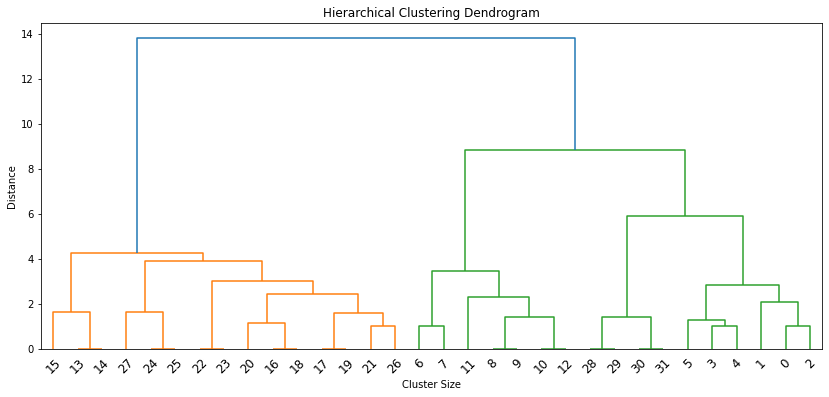

In [45]:
# Plotting Dendogram
dendrogram(Z, leaf_rotation=45., leaf_font_size=12.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.rcParams["figure.figsize"] = (14,6)
plt.show()

## Scree Plot

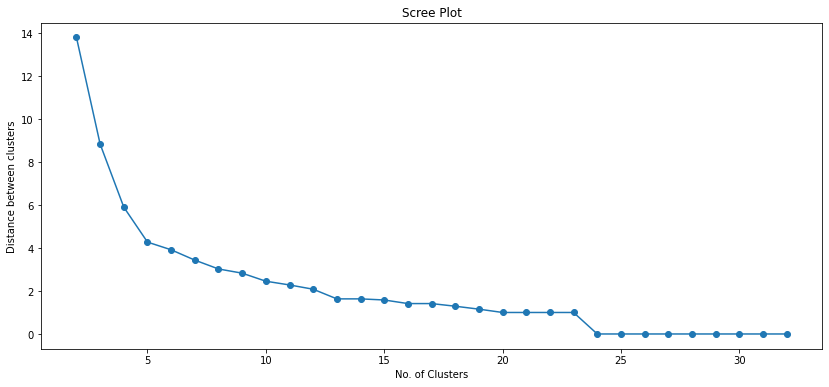

In [8]:
y=[]
# Appending distance between clusters at every iteration in for loop
for k in range(2,33):
    Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward', compute_distances=True).fit(X)
    y.append(Hclustering.distances_)
    #print(y)
    
# X values = Number of clusters in decending order
x = np.array([i for i in range(32,1,-1)])

# Y values = Distance between clusters
y = np.array(y[0]) 

plt.title('Scree Plot')
plt.xlabel('No. of Clusters')
plt.ylabel('Distance between clusters')
plt.plot(x,y, marker='o')

## Inference 
<span style="color:purple"> <strong>The place where the scree plot changes from a sharp downward slope to a more level slope is when distance between clusters is around 4. 

In [9]:
# Distance between clusters at every iteration , printing y values
y

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.15470054,  1.29099445,
        1.41421356,  1.41421356,  1.58113883,  1.63299316,  1.63299316,
        2.081666  ,  2.28035085,  2.45434503,  2.82842712,  3.02371578,
        3.43511281,  3.91578004,  4.27395211,  5.89915248,  8.83309286,
       13.79286545])

## Inference :

<span style="color:purple"> <strong> Since the place where the scree plot changes from a sharp downward slope to a more level slope is when distance between clusters is around 4, we should check the exact values : 4th and 5th dots have y values as follows.

In [10]:
y[-4]

4.273952113286562

In [46]:
y[-5]

3.9157800414902435

## Optimal number of Clusters

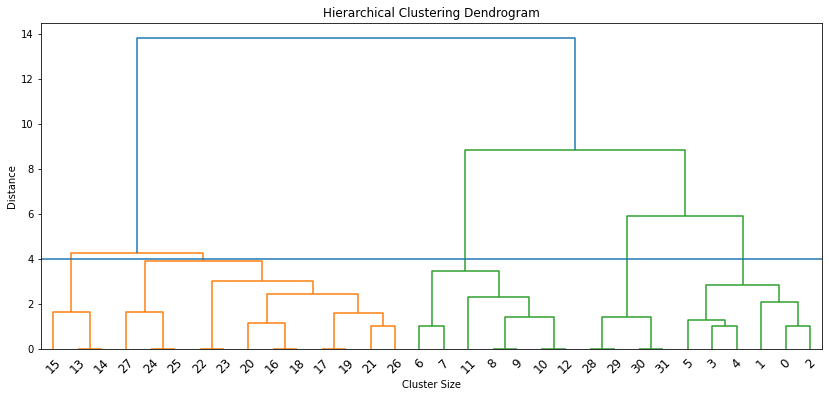

In [59]:
#plotting
dendrogram(Z, leaf_rotation=45., leaf_font_size=12.)
plt.axhline(y=4) 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.rcParams["figure.figsize"] = (14,6)
plt.show()

## Inference :
<span style="color:purple"> <strong> The optimal number of clusters is either 5 or 6. Let us observe both cases.

## Generating 2D plot to visualize and compare optimal number of clusters

### when k=5  -

In [50]:
k = 5

# Performing Agglomerative Clustering
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

# Class labels
Hclustering.labels_

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3], dtype=int64)

In [51]:
# Adding a Class column
y_labels=np.array(Hclustering.labels_)
df['Class']=y_labels

# Updated table of similar values
df 

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
1,BROWN BAT,2,3,1,1,3,3,3,3,1
2,MOLE,3,2,1,0,3,3,3,3,1
3,SILVER HAIR BAT,2,3,1,1,2,3,3,3,1
4,PIGMY BAT,2,3,1,1,2,2,3,3,1
5,HOUSE BAT,2,3,1,1,1,2,3,3,1
6,RED BAT,1,3,1,1,2,2,3,3,1
7,PIKA,2,1,0,0,2,2,3,3,2
8,RABBIT,2,1,0,0,3,2,3,3,2
9,BEAVER,1,1,0,0,2,1,3,3,2
10,GROUNDHOG,1,1,0,0,2,1,3,3,2


In [52]:
# Creating new sub tables based on the new classes
class1=df[df.Class==0]
class2=df[df.Class==1]
class3=df[df.Class==2]
class4=df[df.Class==3]
class5=df[df.Class==4]

In [53]:
class1

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
17,MARTEN,3,3,1,1,4,4,1,2,0
18,WEASEL,3,3,1,1,3,3,1,2,0
19,WOLVERINE,3,3,1,1,4,4,1,2,0
20,BADGER,3,3,1,1,3,3,1,2,0
21,RIVER OTTER,3,3,1,1,4,3,1,2,0
22,SEA OTTER,3,2,1,1,3,3,1,2,0
23,JAGUAR,3,3,1,1,3,2,1,1,0
24,COUGAR,3,3,1,1,3,2,1,1,0
25,FUR SEAL,3,2,1,1,4,4,1,1,0
26,SEA LION,3,2,1,1,4,4,1,1,0


In [54]:
class2

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
1,BROWN BAT,2,3,1,1,3,3,3,3,1
2,MOLE,3,2,1,0,3,3,3,3,1
3,SILVER HAIR BAT,2,3,1,1,2,3,3,3,1
4,PIGMY BAT,2,3,1,1,2,2,3,3,1
5,HOUSE BAT,2,3,1,1,1,2,3,3,1
6,RED BAT,1,3,1,1,2,2,3,3,1


In [55]:
class3

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
7,PIKA,2,1,0,0,2,2,3,3,2
8,RABBIT,2,1,0,0,3,2,3,3,2
9,BEAVER,1,1,0,0,2,1,3,3,2
10,GROUNDHOG,1,1,0,0,2,1,3,3,2
11,GRAY SQUIRREL,1,1,0,0,1,1,3,3,2
12,HOUSE MOUSE,1,1,0,0,0,0,3,3,2
13,PORCUPINE,1,1,0,0,1,1,3,3,2


In [56]:
class4

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
29,REINDEER,0,4,1,0,3,3,3,3,3
30,ELK,0,4,1,0,3,3,3,3,3
31,DEER,0,4,0,0,3,3,3,3,3
32,MOOSE,0,4,0,0,3,3,3,3,3


In [57]:
class5

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
14,WOLF,3,3,1,1,4,4,2,3,4
15,BEAR,3,3,1,1,4,4,2,3,4
16,RACCOON,3,3,1,1,4,4,3,2,4


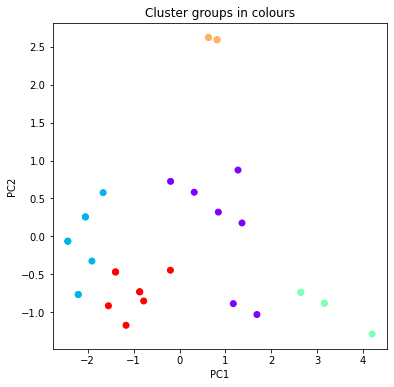

In [69]:
# Reducing the dimensionality of the Data to plot and figure out optimal number of clusters
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(df.iloc[:,1:-2])
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] #1st 2 principle components have maximum info about data

ac2 = AgglomerativeClustering(n_clusters = 5)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.title('Cluster groups in colours')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Inference :
<span style="color:purple"> <strong> 5 clusters are good enough, but we can do better since the 2 purple data points, at the bottom right, are far apart from the purple cluster in the centre of the plot. In my opinion they should be best classified in another cluster. Let us observe when number of clusters, k=6. </strong></span>

### when k=6 -

In [60]:
df.drop(['Class'], axis=1)
k = 6

# Performing Agglomerative Clustering
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

AgglomerativeClustering(n_clusters=6)

In [61]:
# Adding a Class column
y_labels=np.array(Hclustering.labels_)
df['Class']=y_labels
df #Table of similar values

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
1,BROWN BAT,2,3,1,1,3,3,3,3,1
2,MOLE,3,2,1,0,3,3,3,3,1
3,SILVER HAIR BAT,2,3,1,1,2,3,3,3,1
4,PIGMY BAT,2,3,1,1,2,2,3,3,1
5,HOUSE BAT,2,3,1,1,1,2,3,3,1
6,RED BAT,1,3,1,1,2,2,3,3,1
7,PIKA,2,1,0,0,2,2,3,3,0
8,RABBIT,2,1,0,0,3,2,3,3,0
9,BEAVER,1,1,0,0,2,1,3,3,0
10,GROUNDHOG,1,1,0,0,2,1,3,3,0


In [62]:
# Creating new sub tables based on the new classes
class1=df[df.Class==0]
class2=df[df.Class==1]
class3=df[df.Class==2]
class4=df[df.Class==3]
class5=df[df.Class==4]
class6=df[df.Class==5]

In [63]:
class1

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
7,PIKA,2,1,0,0,2,2,3,3,0
8,RABBIT,2,1,0,0,3,2,3,3,0
9,BEAVER,1,1,0,0,2,1,3,3,0
10,GROUNDHOG,1,1,0,0,2,1,3,3,0
11,GRAY SQUIRREL,1,1,0,0,1,1,3,3,0
12,HOUSE MOUSE,1,1,0,0,0,0,3,3,0
13,PORCUPINE,1,1,0,0,1,1,3,3,0


In [64]:
class2

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
1,BROWN BAT,2,3,1,1,3,3,3,3,1
2,MOLE,3,2,1,0,3,3,3,3,1
3,SILVER HAIR BAT,2,3,1,1,2,3,3,3,1
4,PIGMY BAT,2,3,1,1,2,2,3,3,1
5,HOUSE BAT,2,3,1,1,1,2,3,3,1
6,RED BAT,1,3,1,1,2,2,3,3,1


In [65]:
class3

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
17,MARTEN,3,3,1,1,4,4,1,2,2
18,WEASEL,3,3,1,1,3,3,1,2,2
19,WOLVERINE,3,3,1,1,4,4,1,2,2
20,BADGER,3,3,1,1,3,3,1,2,2
21,RIVER OTTER,3,3,1,1,4,3,1,2,2
22,SEA OTTER,3,2,1,1,3,3,1,2,2
23,JAGUAR,3,3,1,1,3,2,1,1,2
24,COUGAR,3,3,1,1,3,2,1,1,2
27,GREY SEAL,3,2,1,1,3,3,2,2,2


In [66]:
class4

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
29,REINDEER,0,4,1,0,3,3,3,3,3
30,ELK,0,4,1,0,3,3,3,3,3
31,DEER,0,4,0,0,3,3,3,3,3
32,MOOSE,0,4,0,0,3,3,3,3,3


In [67]:
class5

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
14,WOLF,3,3,1,1,4,4,2,3,4
15,BEAR,3,3,1,1,4,4,2,3,4
16,RACCOON,3,3,1,1,4,4,3,2,4


In [68]:
class6

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars,Class
25,FUR SEAL,3,2,1,1,4,4,1,1,5
26,SEA LION,3,2,1,1,4,4,1,1,5
28,ELEPHANT SEAL,2,1,1,1,4,4,1,1,5


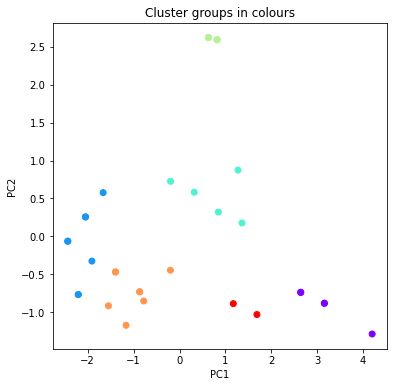

In [72]:
# Reducing the dimensionality of the Data to plot and figure out optimal clusters
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(df.iloc[:,1:-2])
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

ac2 = AgglomerativeClustering(n_clusters = 6)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.title('Cluster groups in colours')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Inference :
<span style="color:purple"> <strong> Here, the cyan data points centre and the bottom 2 red data points have been classified as separate clusters. This looks like an apt classification, since the red points are far apart from cyan points. So the optimal number of clusters should be 6. </strong></span>